In [1]:
import numpy as np
import pandas as pd
from operator import itemgetter

from rdkit import Chem
from rdkit.Chem import AllChem

from IPython.core.display import display
from IPython.display import SVG
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True  # Change output to SVG
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.minFontSize = 18
IPythonConsole.drawOptions.prepareMolsBeforeDrawing = True
from rdkit.Chem.Draw.MolDrawing import MolDrawing
MolDrawing.atomLabelFontSize=18

In [2]:
df = pd.read_pickle('results.pkl')
df[df['Reaction ID'] == '3d']

,Reaction ID,Reactant(s),energies_neu,complexes_neu,products_neu,legends_neu,energies_cat,complexes_cat,products_cat,legends_cat,xtb_one_all_names_neu,xtb_one_all_products_neu,xtb_energies_neu,one_energies_neu,all_energies_neu,xtb_one_all_names_cat,xtb_one_all_products_cat,xtb_energies_cat,one_energies_cat,all_energies_cat
15,3d,"[C=CCO, Ic1cccc2ccccc12]","[-5356668.567770743, -5356653.943741458, -5356...",[<rdkit.Chem.rdchem.Mol object at 0x16b8a5b30>...,[<rdkit.Chem.rdchem.Mol object at 0x16bd3f900>...,"[0.00 kJ/mol [1], 14.62 kJ/mol [2], 35.87 kJ/m...","[-7294849.003023394, -7294804.481205683]",[<rdkit.Chem.rdchem.Mol object at 0x16bd4b310>...,[<rdkit.Chem.rdchem.Mol object at 0x16bd51270>...,"[0.00 kJ/mol [5], 44.52 kJ/mol [6]]","[3d_4_0, 3d_3_0, 3d_2_0, 3d_1_0]",[<rdkit.Chem.rdchem.Mol object at 0x16bd5e220>...,"[-251372.0053082109, -251384.1553524413, -2513...","[-5356604.632296126, -5356632.693631292, -5356...","[-5356619.439637219, -5356632.693631292, -5356...","[3d_5_0, 3d_6_0]",[<rdkit.Chem.rdchem.Mol object at 0x16bd6a720>...,"[-368246.8518871679, -368249.78516886523]","[-7294849.003023394, -7294804.481205683]","[-7294849.003023394, -7294804.481205683]"


DFT (all) neutral pathway


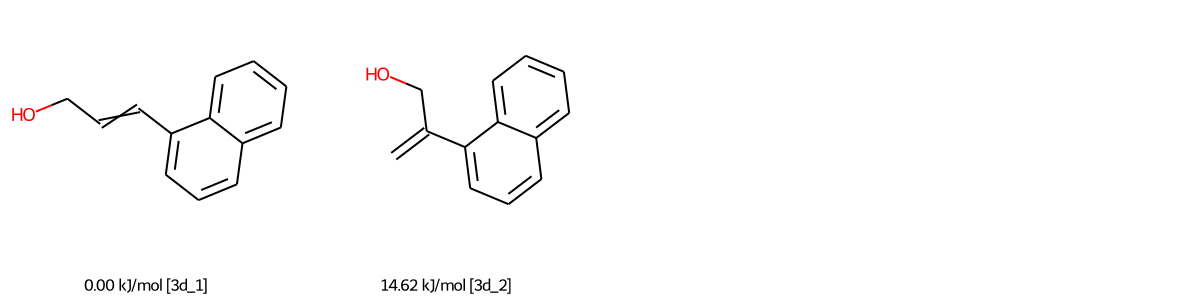

DFT (all) cationic pathway


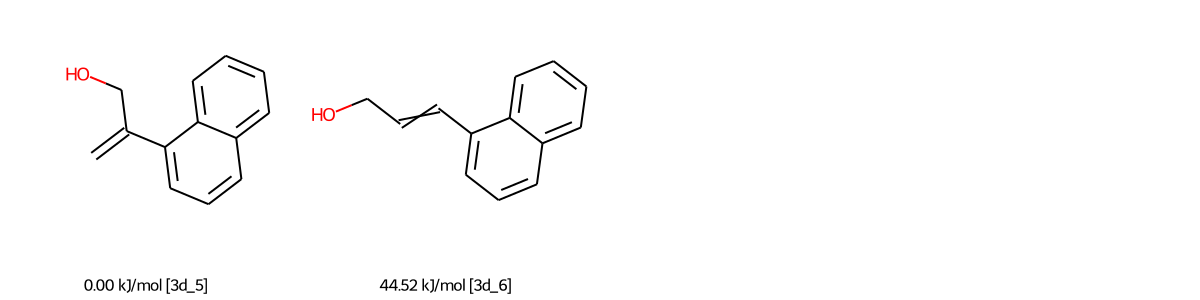

In [3]:
for idx, row in df.iterrows():
    rxn_id = row['Reaction ID']
    
    # show only results of "3d"
    if rxn_id != '3d':
        continue

    # Neutral
    xtb_one_all_names_neu = row.xtb_one_all_names_neu
    xtb_one_all_products_neu = row.xtb_one_all_products_neu
    xtb_energies_neu = row.xtb_energies_neu
    one_energies_neu = row.one_energies_neu
    all_energies_neu = row.all_energies_neu

    # Cationic
    xtb_one_all_names_cat = row.xtb_one_all_names_cat
    xtb_one_all_products_cat = row.xtb_one_all_products_cat
    xtb_energies_cat = row.xtb_energies_cat
    one_energies_cat = row.one_energies_cat
    all_energies_cat = row.all_energies_cat

    names_list = [xtb_one_all_names_neu, xtb_one_all_names_neu, xtb_one_all_names_neu, xtb_one_all_names_cat, xtb_one_all_names_cat, xtb_one_all_names_cat]
    products_list = [xtb_one_all_products_neu, xtb_one_all_products_neu, xtb_one_all_products_neu, xtb_one_all_products_cat, xtb_one_all_products_cat, xtb_one_all_products_cat]
    energies_list = [xtb_energies_neu, one_energies_neu, all_energies_neu, xtb_energies_cat, one_energies_cat, all_energies_cat]
    method_list = ['xTB neutral pathway', 'DFT (one) neutral pathway', 'DFT (all) neutral pathway', 'xTB cationic pathway', 'DFT (one) cationic pathway', 'DFT (all) cationic pathway']
    for names, products, energies, method in zip(names_list, products_list, energies_list, method_list):

        if method not in ['DFT (all) neutral pathway', 'DFT (all) cationic pathway']:
            continue
    
        legends = [f'{energy - min(energies):.2f} kJ/mol [{"_".join(name.split("_")[:2])}]' for name, energy in zip(names, energies)]
    
        # Sort lists (energies, products, and legends) according to the energies in ascending order
        all_lists = list(zip(energies, products, legends))
        all_lists = sorted(all_lists, key=itemgetter(0))
        energies = [item[0] for item in all_lists]
        products = [item[1] for item in all_lists]
        legends = [item[2] for item in all_lists]

        # Extract only unique products
        smiless = [Chem.MolToSmiles(m, isomericSmiles=False) for m in products]
        indexes = np.unique(smiless, return_index=True)[1]
        energies = [energies[index] for index in sorted(indexes)]
        products = [products[index] for index in sorted(indexes)]
        legends = [legends[index] for index in sorted(indexes)]

        # # Extract only products within the cutoff
        # products_within_cutoff = len(np.where(np.array(energies) - min(energies) <= cutoff)[0])
        # energies = energies[:products_within_cutoff]
        # products = products[:products_within_cutoff]
        # legends = legends[:products_within_cutoff]
        
        print(method)
        display(Chem.Draw.MolsToGridImage(products, legends=legends, molsPerRow=4, subImgSize=(300,300), useSVG=True))